In [2]:
## importing packages
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
df_book = pd.read_csv('../data/top_books.csv')
df_book = df_book.drop(df_book.columns[0], axis =1)
df_book

,Book,Author,Original_Language,First_Published,Approximate_Sales,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,All_Genre,Age_Category
0,A Tale of Two Cities,Charles Dickens,English,1859,200000000,Historical fiction,NaN,NaN,NaN,NaN,NaN,Historical fiction,Adult
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200000000,Fantasy,children's fiction,NaN,NaN,NaN,NaN,"Fantasy, children's fiction",Children
2,The Alchemist (O Alquimista),Paulo Coelho,Portuguese,1988,150000000,Fantasy,NaN,NaN,NaN,NaN,NaN,Fantasy,Adult
3,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120000000,Fantasy,children's fiction,NaN,NaN,NaN,NaN,"Fantasy, children's fiction",Children
4,And Then There Were None,Agatha Christie,English,1939,100000000,Mystery,NaN,NaN,NaN,NaN,NaN,Mystery,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Bridget Jones's Diary,Helen Fielding,English,1996,10000000,NaN,NaN,NaN,NaN,NaN,NaN,novel,Adult
162,It Ends with Us,Colleen Hoover,English,2016,10000000,Romance,Fiction,NaN,NaN,NaN,NaN,"Romance, Fiction",Adult
163,"The Lion, the Witch and the Wardrobe",C.S. Lewis,English,1950,85000000,Fantasy,children's fiction,NaN,NaN,NaN,NaN,"Fantasy, children's fiction",Children
164,"The Secret Diary of Adrian Mole, Aged 13¾",Sue Townsend,English,1982,20000000,Young adult novel,NaN,NaN,NaN,NaN,NaN,Young adult novel,Young Adult


In [275]:
palette16 = dict(Chinese = "pink", Dutch = "orchid", English = "thistle", French = "mediumslateblue", German ="cornflowerblue",
           Italian = "lightsteelblue", Japanese = "lightskyblue", Norwegian ="mediumaquamarine", Polish = "lightgreen", Russian = "lightgoldenrodyellow",
           Swedish = "moccasin", Portuguese = "sandybrown", Spanish = "darksalmon", Czech = "lightcoral",Yiddish = "silver", 
           Gujarati = "darkgrey")

In [ ]:
print("No of fantasy", df_book["All_Genre"].str.contains("fantasy", case = False).sum())
#print("No of horror", df_book["All_Genre"].str.contains("horror", case = False).sum())
print("No of thriller", df_book["All_Genre"].str.contains("thriller", case = False).sum())
print("No of novel", df_book["All_Genre"].str.contains("novel", case = False).sum())
print("No of autobiographical", df_book["All_Genre"].str.contains("autobiograph", case = False).sum() + df_book["All_Genre"].str.contains("memoir", case = False).sum())
print("No of biographical", df_book["All_Genre"].str.contains("biograph", case = False).sum())
print("No of historical", df_book["All_Genre"].str.contains("historical", case = False).sum())
print("No of gothic", df_book["All_Genre"].str.contains("gothic", case = False).sum())
print("No of self-help", df_book["All_Genre"].str.contains("self-help", case = False).sum())
print("No of romance", df_book["All_Genre"].str.contains("romance", case = False).sum() + df_book["All_Genre"].str.contains("romantic", case = False).sum())
print("No of mystery", df_book["All_Genre"].str.contains("mystery", case = False).sum())
#print("No of dystopian", df_book["All_Genre"].str.contains("dystopian", case = False).sum())
print("No of philosophical", df_book["All_Genre"].str.contains("romance", case = False).sum() + df_book["All_Genre"].str.contains("romantic", case = False).sum())
print("No of mystery", df_book["All_Genre"].str.contains("Philosoph", case = False).sum())
print("No of science fiction", df_book["All_Genre"].str.contains("science fiction", case = False).sum())
#print("No of war", df_book["All_Genre"].str.contains("war", case = False).sum())
#print("No of manual", df_book["All_Genre"].str.contains("manual", case = False).sum())
#print("No of coming-of-age", df_book["All_Genre"].str.contains("coming", case = False).sum())
#print("No of popular science", df_book["All_Genre"].str.contains("popular science", case = False).sum())
print("No of non-fiction", df_book["All_Genre"].str.contains("nonfiction", case = False).sum() + df_book["All_Genre"].str.contains("non-fiction", case = False).sum())
print("No of fiction", df_book["All_Genre"].str.contains(" fiction", case = False).sum() + (df_book["All_Genre"] == "Fiction").sum())
#print("No of Bildungsroman", df_book["All_Genre"].str.contains("Bildungsroman", case = False).sum())

No of fantasy 9
No of thriller 8
No of novel 54
No of autobiographical 12
No of biographical 13
No of historical 13
No of gothic 5
No of self-help 11
No of romance 9
No of mystery 5
No of philosophical 9
No of mystery 6
No of science fiction 6
No of non-fiction 8
No of fiction 37
No of Bildungsroman 4


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Chinese'),
  Text(1, 0, 'Czech'),
  Text(2, 0, 'Dutch'),
  Text(3, 0, 'English'),
  Text(4, 0, 'French'),
  Text(5, 0, 'German'),
  Text(6, 0, 'Gujarati'),
  Text(7, 0, 'Italian'),
  Text(8, 0, 'Japanese'),
  Text(9, 0, 'Norwegian'),
  Text(10, 0, 'Portuguese'),
  Text(11, 0, 'Russian'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Swedish'),
  Text(14, 0, 'Yiddish')])

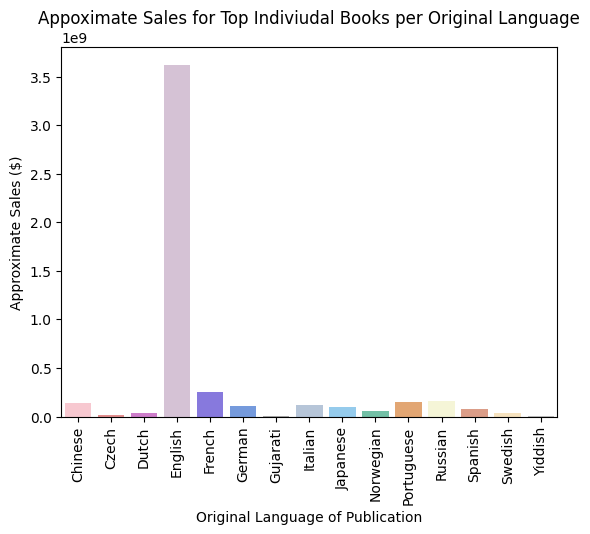

In [276]:
grouped_sales_language = df_book.groupby("Original_Language").sum()
sns.barplot(grouped_sales_language, x = "Original_Language", y = "Approximate_Sales", hue = "Original_Language", 
            palette = palette16, legend = False, errorbar=None).set(
                xlabel = "Original Language of Publication",
                ylabel = "Approximate Sales ($)",
                title = "Appoximate Sales for Top Indiviudal Books per Original Language")

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Chinese'),
  Text(1, 0, 'Czech'),
  Text(2, 0, 'Dutch'),
  Text(3, 0, 'English'),
  Text(4, 0, 'French'),
  Text(5, 0, 'German'),
  Text(6, 0, 'Gujarati'),
  Text(7, 0, 'Italian'),
  Text(8, 0, 'Japanese'),
  Text(9, 0, 'Norwegian'),
  Text(10, 0, 'Portuguese'),
  Text(11, 0, 'Russian'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Swedish'),
  Text(14, 0, 'Yiddish')])

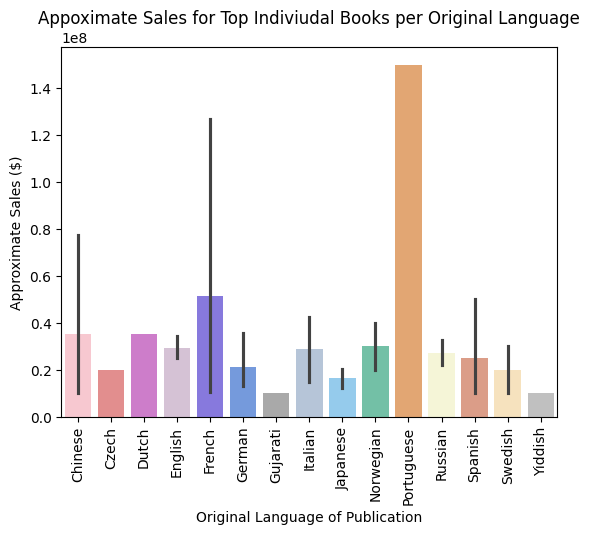

In [277]:
sns.barplot(df_book, x = "Original_Language", y = "Approximate_Sales", hue = "Original_Language", 
            palette= palette16, legend = False, order = df_book.sort_values("Original_Language").Original_Language ).set(
                xlabel = "Original Language of Publication",
                ylabel = "Approximate Sales ($)",
                title = "Appoximate Sales for Top Indiviudal Books per Original Language")

plt.xticks(rotation=90)

In [89]:
grouped_age = pd.DataFrame(df_book.groupby([ "Original_Language", "Age_Category"])['Approximate_Sales'].sum()).unstack() #['Approximate_Sales']

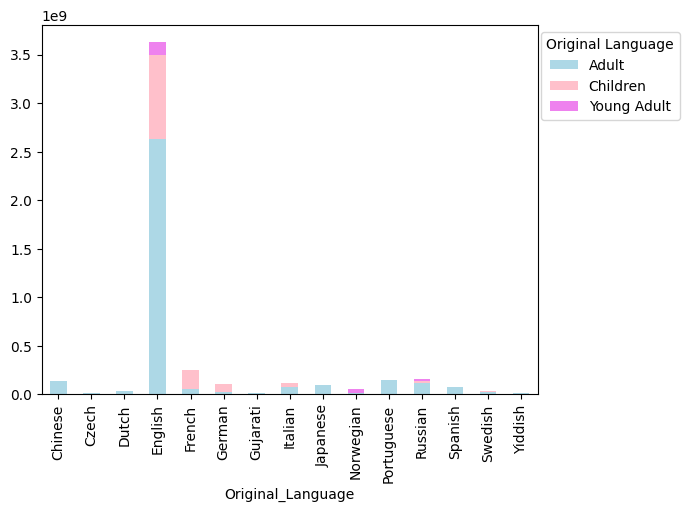

In [ ]:
grouped_age.plot(kind = 'bar', stacked = True, color = ["lightblue", "pink", "violet"], legend=False)

plt.legend(["Adult", "Children", "Young Adult"], loc='upper right', bbox_to_anchor=(1.3, 1), title = "Age Category")

(array([45., 22., 31., 11.,  2., 11.,  6.,  8.,  2.,  1., 13.,  0.,  0.,
         1.,  1.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  0.,  4.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([1.000e+07, 1.380e+07, 1.760e+07, 2.140e+07, 2.520e+07, 2.900e+07,
        3.280e+07, 3.660e+07, 4.040e+07, 4.420e+07, 4.800e+07, 5.180e+07,
        5.560e+07, 5.940e+07, 6.320e+07, 6.700e+07, 7.080e+07, 7.460e+07,
        7.840e+07, 8.220e+07, 8.600e+07, 8.980e+07, 9.360e+07, 9.740e+07,
        1.012e+08, 1.050e+08, 1.088e+08, 1.126e+08, 1.164e+08, 1.202e+08,
        1.240e+08, 1.278e+08, 1.316e+08, 1.354e+08, 1.392e+08, 1.430e+08,
        1.468e+08, 1.506e+08, 1.544e+08, 1.582e+08, 1.620e+08, 1.658e+08,
        1.696e+08, 1.734e+08, 1.772e+08, 1.810e+08, 1.848e+08, 1.886e+08,
        1.924e+08, 1.962e+08, 2.000e+08]),
 <BarContainer object of 50 artists>)

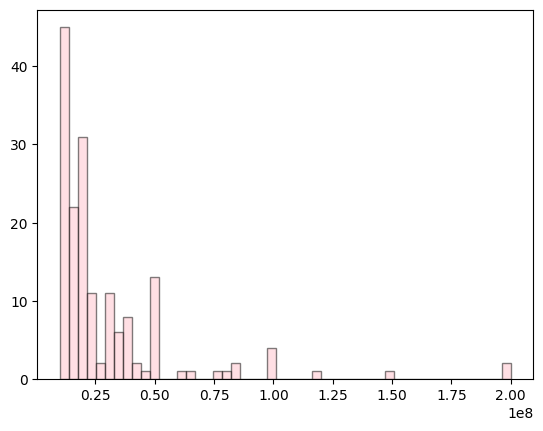

In [219]:
plt.hist(df_book['Approximate_Sales'], bins=50,
          color='pink', edgecolor='black', alpha = 0.5)

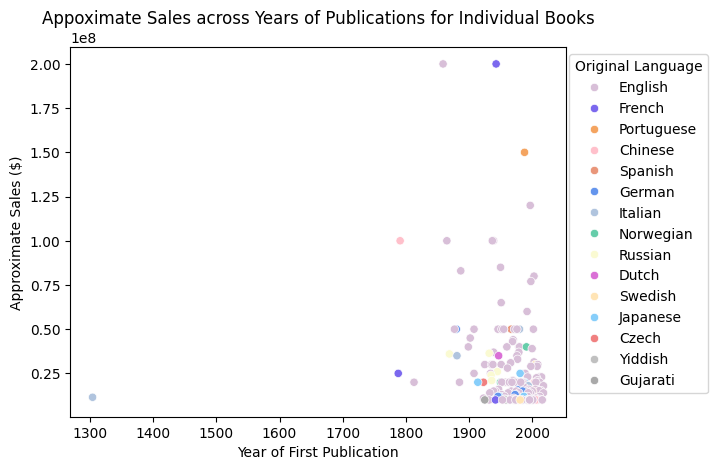

In [278]:
#sns.set_palette("rocket", as_cmap=True)
ax = sns.scatterplot(data=df_book, y="Approximate_Sales", x="First_Published", 
            hue="Original_Language", palette = palette16).set(
                xlabel = "Year of First Publication",
                ylabel = "Approximate Sales ($)",
                title = "Appoximate Sales across Years of Publications for Individual Books"
                )
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title = "Original Language")

In [178]:
children = df_book[df_book["Age_Category"] == "Children"][["First_Published", "Approximate_Sales"]].groupby("First_Published").sum().cumsum().reset_index()
children["Age_Category"] = "Children"

young_adult = df_book[df_book["Age_Category"] == "Young Adult"][["First_Published", "Approximate_Sales"]].groupby("First_Published").sum().cumsum().reset_index()
young_adult["Age_Category"] = "Young Adult"

adult = df_book[df_book["Age_Category"] == "Adult"][["First_Published", "Approximate_Sales"]].groupby("First_Published").sum().cumsum().reset_index()
adult["Age_Category"] = "Adult"

age_range_sales = pd.concat([children, young_adult, adult])

(1900.0, 2025.0)

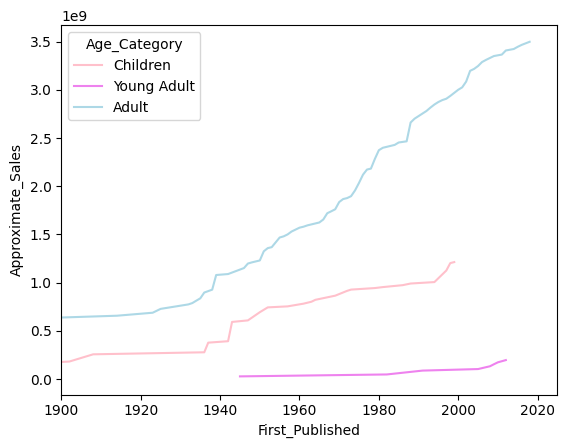

In [218]:
sns.lineplot(age_range_sales, x="First_Published", y ="Approximate_Sales", 
             hue="Age_Category", palette = ["pink", "violet", "lightblue"]).set_xlim(left = 1900, right =2025)

In [181]:
df_series = pd.read_csv('../data/top_series.csv')
df_series = df_series.drop(df_series.columns[0], axis =1)
df_series

,Book_Series,Author,Original_Language,No_of_Installments,Years_of_Publication,Approximate_Sales,Genre_1,Genre_2,First_Installment_Published,Last_Installment_Published,No_of_Main_Books,No_of_Extras,Extras,All_Genre
0,Harry Potter,J. K. Rowling,English,7 + 3 companion books + 4 scripts,1997–2007,600000000,NaN,NaN,1997,2007,7.0,7.0,True,NaN
1,Goosebumps,R. L. Stine,English,62 + spin-off series,1992–2025,400000000,NaN,NaN,1992,2025,62.0,NaN,True,NaN
2,Perry Mason,Erle Stanley Gardner,English,82 + 4 short stories,1933–1973,300000000,NaN,NaN,1933,1973,82.0,4.0,True,NaN
3,Diary of a Wimpy Kid,Jeff Kinney,English,19 + 5 spin-offs,2007–2025,290000000,NaN,NaN,2007,2025,19.0,5.0,True,NaN
4,Berenstain Bears,Stan and Jan Berenstain,English,428,1962–2025,260000000,NaN,NaN,1962,2025,428.0,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Horrible Histories,Terry Deary,English,24,1993–2025,20000000,NaN,NaN,1993,2025,24.0,NaN,False,NaN
124,Rainbow Magic,Daisy Meadows,English,80,2003–2025,20000000,NaN,NaN,2003,2025,80.0,NaN,False,NaN
125,Morgan Kane,Louis Masterson,Norwegian,90,1966-2025,20000000,NaN,NaN,1966,2025,90.0,NaN,False,NaN
126,The Southern Vampire Mysteries,Charlaine Harris,English,13,2001–2013,20000000,NaN,NaN,2001,2013,13.0,NaN,False,NaN


(array([45., 19., 11.,  5.,  4.,  8.,  3.,  4.,  5.,  3.,  0.,  3.,  3.,
         1.,  2.,  5.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.500e+07, 2.670e+07, 3.840e+07, 5.010e+07, 6.180e+07, 7.350e+07,
        8.520e+07, 9.690e+07, 1.086e+08, 1.203e+08, 1.320e+08, 1.437e+08,
        1.554e+08, 1.671e+08, 1.788e+08, 1.905e+08, 2.022e+08, 2.139e+08,
        2.256e+08, 2.373e+08, 2.490e+08, 2.607e+08, 2.724e+08, 2.841e+08,
        2.958e+08, 3.075e+08, 3.192e+08, 3.309e+08, 3.426e+08, 3.543e+08,
        3.660e+08, 3.777e+08, 3.894e+08, 4.011e+08, 4.128e+08, 4.245e+08,
        4.362e+08, 4.479e+08, 4.596e+08, 4.713e+08, 4.830e+08, 4.947e+08,
        5.064e+08, 5.181e+08, 5.298e+08, 5.415e+08, 5.532e+08, 5.649e+08,
        5.766e+08, 5.883e+08, 6.000e+08]),
 <BarContainer object of 50 artists>)

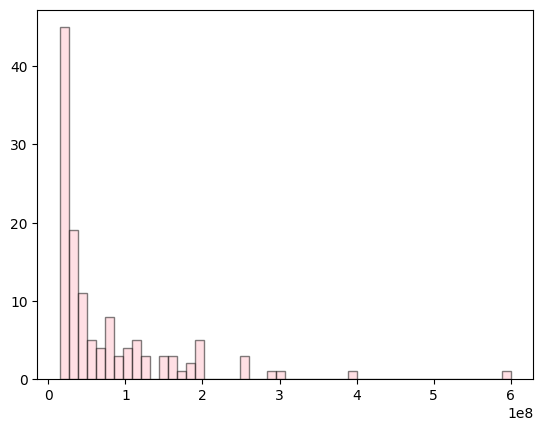

In [214]:
plt.hist(df_series['Approximate_Sales'], bins=50,
          color='pink', edgecolor='black', alpha = 0.5)

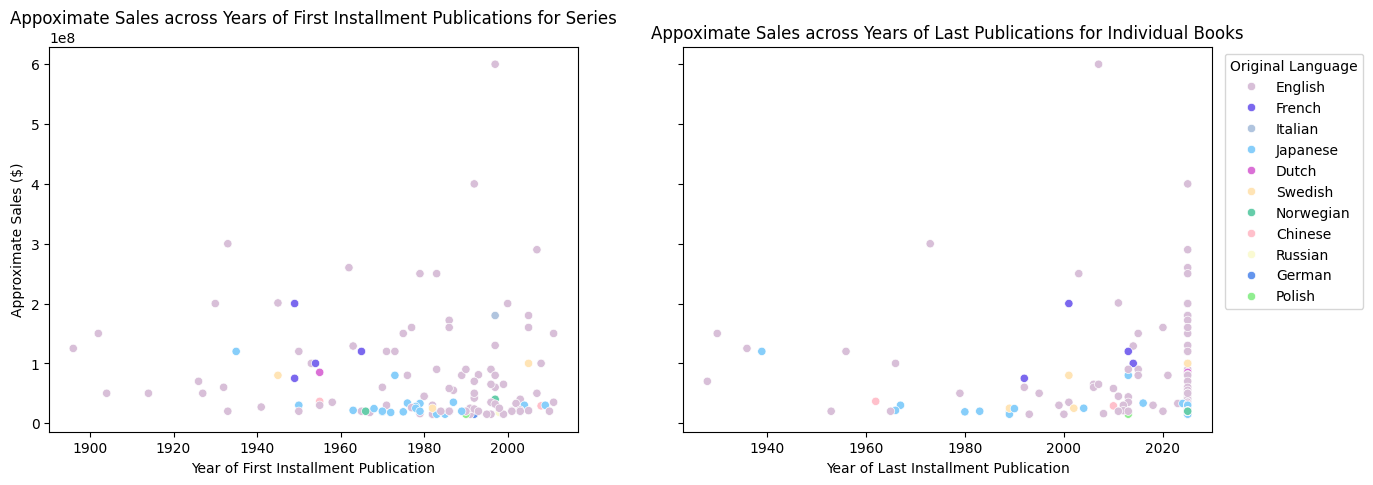

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

ax = sns.scatterplot(data=df_series, y="Approximate_Sales", x="First_Installment_Published", 
            hue="Original_Language", palette = palette16, ax=axs[0], legend=False).set(
                xlabel = "Year of First Installment Publication",
                ylabel = "Approximate Sales ($)",
                title = "Appoximate Sales across Years of First Installment Publications for Series"
                )

sns.scatterplot(data=df_series, y="Approximate_Sales", x="Last_Installment_Published", 
            hue="Original_Language", palette = palette16, ax = axs[1]).set(
                yticklabels=[],
                ylabel = None,
                xlabel = "Year of Last Installment Publication",
                title = "Appoximate Sales across Years of Last Publications for Individual Books"
                )
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title = "Original Language")


[Text(0.5, 0, 'Original Language of Publication'),
 Text(0, 0.5, 'Approximate Sales ($)'),
 Text(0.5, 1.0, 'Average Appoximate Sales for Top Series per Original Language')]

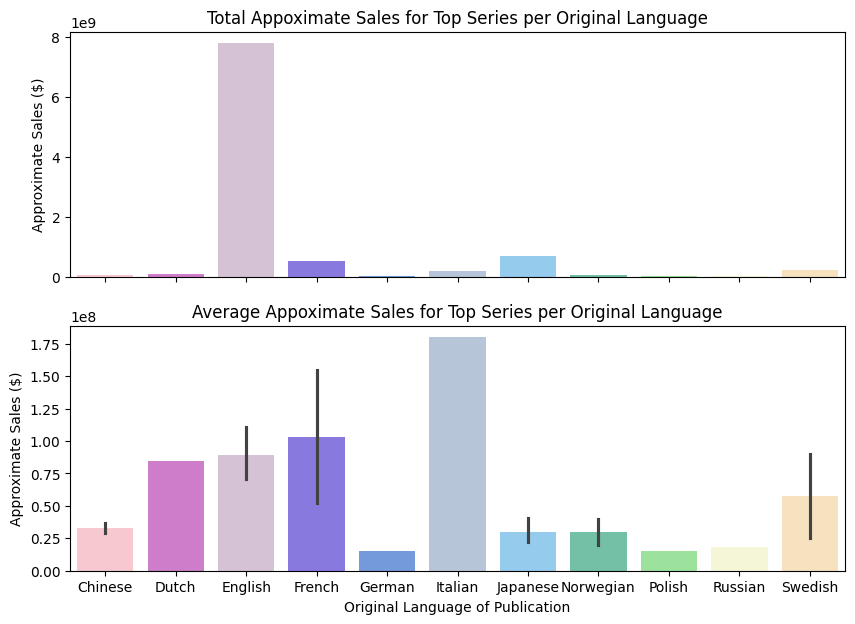

In [268]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 7))

grouped_sales_language = df_series.groupby("Original_Language").sum()
sns.barplot(grouped_sales_language, x = "Original_Language", y = "Approximate_Sales", hue = "Original_Language", 
         palette = palette16, legend = False, errorbar=None, ax = axs[0],
            order = df_series.sort_values("Original_Language").Original_Language).set(
                xticklabels=[],
                xlabel = None,
                ylabel = "Approximate Sales ($)",
                title = "Total Appoximate Sales for Top Series per Original Language")


sns.barplot(df_series, x = "Original_Language", y = "Approximate_Sales", hue = "Original_Language", 
            palette= palette16, legend = False, order = df_series.sort_values("Original_Language").Original_Language ).set(
                xlabel = "Original Language of Publication",
                ylabel = "Approximate Sales ($)",
                title = "Average Appoximate Sales for Top Series per Original Language")

[Text(0.5, 0, 'No of Books Not in Main Series'),
 Text(0, 0.5, 'Count of Series'),
 Text(0.5, 1.0, 'Histogram of No of Books Not in Main Series')]

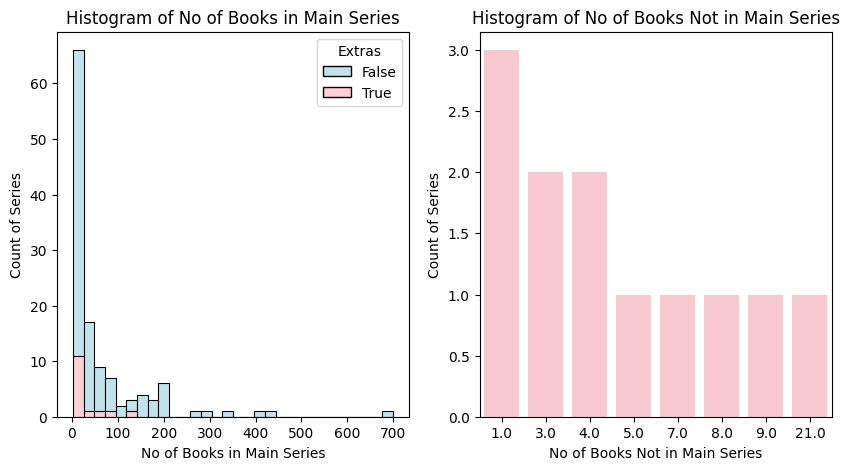

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

sns.histplot(df_series, x = "No_of_Main_Books", stat = "count",
             bins = 30, hue='Extras', multiple='stack', palette=['lightblue', 'pink'], 
             ax=axs[0]).set(
                xlabel = "No of Books in Main Series",
                ylabel = "Count of Series",
                title = "Histogram of No of Books in Main Series")

sns.countplot(df_series, x = "No_of_Extras", color ="pink" , ax = axs[1]).set(
                xlabel = "No of Books Not in Main Series",
                ylabel = "Count of Series",
                title = "Histogram of No of Books Not in Main Series")